# Task-3 
# Feature Engineering

In [2]:
# import dependencencies
import os
import sys
import numpy as np
import pandas as pd
import sidetable
import importlib
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xverse.transformer import WOE
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## importing the pipeline from the src called data_processing.py 

In [35]:
# import the FeatureEngineeringPipeline from the src module
#importlib.reload(sys.modules['src.data_processing'])
from src.data_processing import FeatureEngineeringPipeline

# raw Data Loading

In [2]:
df= pd.read_csv('F:/Credit-Risk-Model/data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Understanding datatype 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [132]:
# Check numeric variables
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [133]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


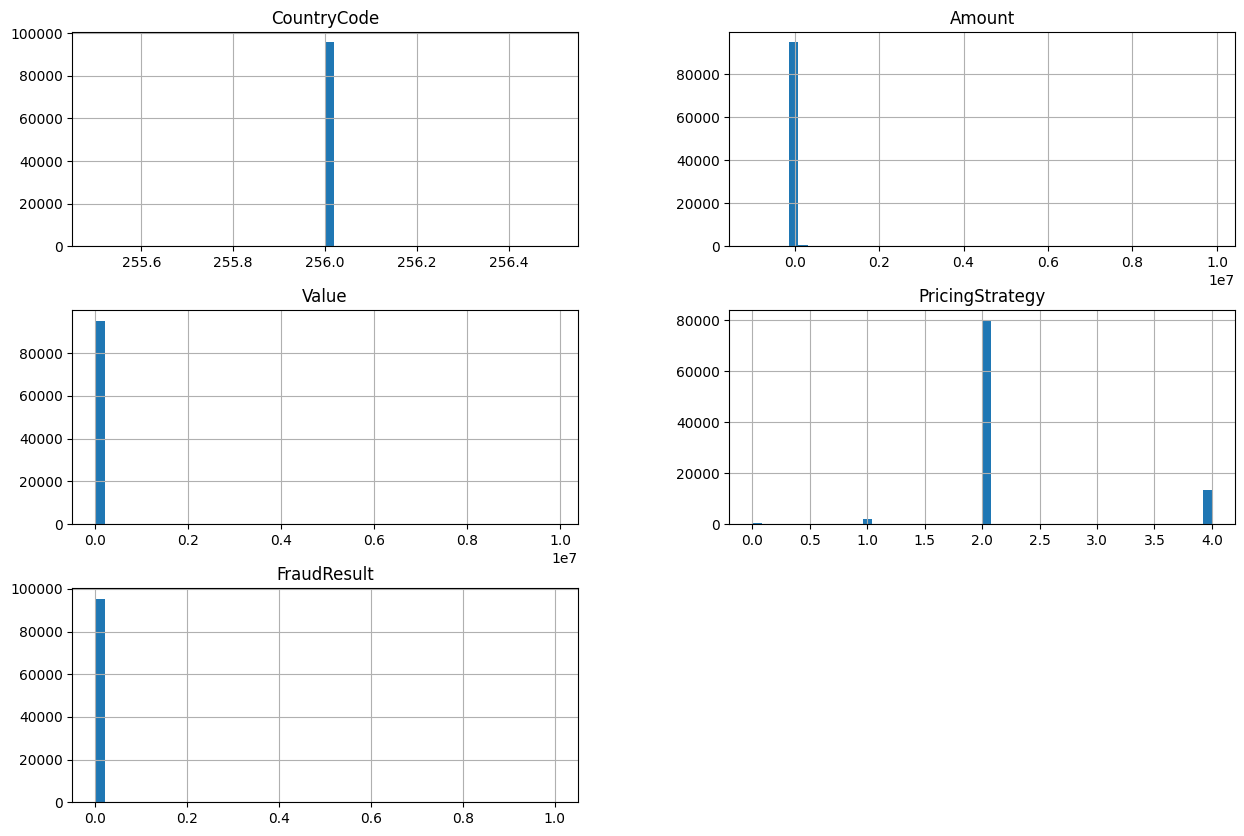

In [9]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [19]:
# Correlation matrix
numeric_df = df.drop(columns=['CountryCode'])
numeric_df = numeric_df.select_dtypes(include=['number'])
#exclude CountryCode column


In [20]:

numeric_df.corr()

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


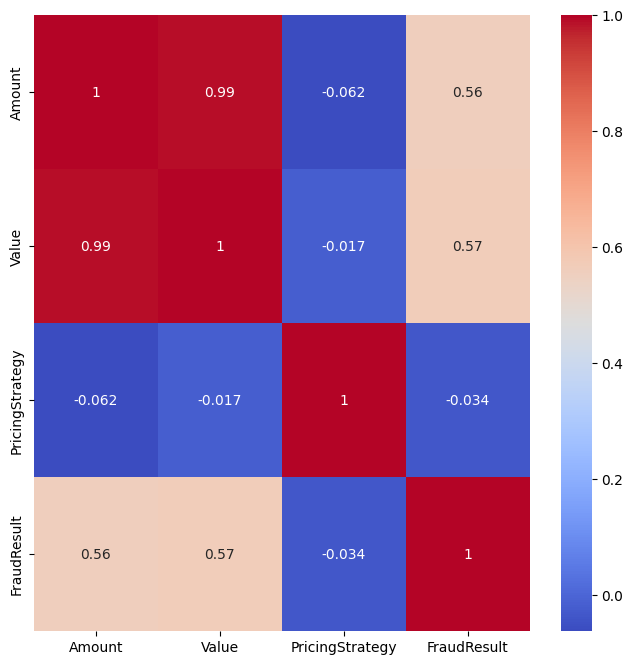

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

# Feature Engineering 
- Create Aggregate Features:
	
   ○	Total Transaction Amount: Sum of all transaction amounts for each customer.

   ○	Average Transaction Amount: Average transaction amount per customer.

   ○	Transaction Count: Number of transactions per customer.

   ○	Standard Deviation of Transaction Amounts: Variability of transaction amounts per customer.



## 1. Create Aggregate Feature

In [50]:
#initialize the feature engineering pipeline
fe_pipeline = FeatureEngineeringPipeline()
#Aggregate the features
df = fe_pipeline.create_aggregate_features(
            df,
            group_by_col= 'CustomerId', 
            amount_col= 'Amount',
)
# Display the first few rows of the aggregated DataFrame
df.head()         

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,total_amount,avg_amount,trans_count,std_amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


## 2. Feature Extraction 

○	Transaction Hour: The hour of the day when the transaction occurred.

○	Transaction Day: The day of the month when the transaction occurred.

○	Transaction Month: The month when the transaction occurred.

○	Transaction Year: The year when the transaction occurred.


In [51]:
# extract features from the datetime column
fe_pipeline = FeatureEngineeringPipeline()
df = fe_pipeline.extract_datetime_features(
            df,
            datetime_column='TransactionStartTime',  # Specify the datetime column
)
# Display the first few rows of the DataFrame with extracted features
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_amount,avg_amount,trans_count,std_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


## Encode Categorical Variables

Convert categorical variables into numerical format by using:

○	One-Hot Encoding: Converts categorical values into binary vectors.

○	Label Encoding: Assigns a unique integer to each category.


# 🧠 Choose Encoding Method Based on Column Type:
TransactionId, BatchId, SubscriptionId	Often unique — consider dropping or Label Encoding if needed

AccountId, CustomerId, ProviderId, ProductId	Label Encoding (IDs with many unique values)

CurrencyCode, CountryCode, ProductCategory, ChannelId, PricingStrategy	 One-Hot Encoding (few, known categories)

# 🛠️ 1. Label Encoding for ID Columns

In [52]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId','ChannelId']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])
    
# Display the first few rows of the DataFrame to verify changes
df.head(10)






,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,total_amount,avg_amount,trans_count,std_amount,transaction_hour,transaction_day,transaction_month,transaction_year
0,78150,46980,2490,3535,2584,UGX,256,5,1,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,75821,31755,3219,2366,2584,UGX,256,3,19,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,39888,60272,2713,996,2806,UGX,256,5,0,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,48738,1797,3351,974,3733,UGX,256,0,11,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,41364,48941,3219,2366,3733,UGX,256,3,19,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
5,37653,39491,73,2701,318,UGX,256,5,16,airtime,...,2,0,2000.00,2000.000000,1,0.000000,3,15,11,2018
6,13662,13782,1187,801,1326,UGX,256,4,16,airtime,...,4,0,93400.00,3220.689655,29,5493.966126,3,15,11,2018
7,486,48778,3219,2366,1326,UGX,256,3,19,financial_services,...,2,0,93400.00,3220.689655,29,5493.966126,3,15,11,2018
8,59274,90214,1433,3121,3354,UGX,256,5,1,airtime,...,2,0,8060.00,2015.000000,4,3342.588817,4,15,11,2018
9,22881,81620,3399,3569,36,UGX,256,0,6,financial_services,...,2,0,13788.00,1969.714286,7,1911.444629,4,15,11,2018


## 🛠️ 2. One-Hot Encoding for Category Columns

For categorical variables with a few values:

In [53]:
# One-Hot Encoding: Converts categorical values into binary vectors.
# For categorical variables with a few values
df = pd.get_dummies(df, columns=['CurrencyCode', 'ProductCategory'], drop_first=1)
# Display the first few rows of the DataFrame to verify changes
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,transaction_month,transaction_year,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,78150,46980,2490,3535,2584,256,5,1,2,1000.0,...,11,2018,False,False,False,False,False,False,False,False
1,75821,31755,3219,2366,2584,256,3,19,1,-20.0,...,11,2018,False,True,False,False,False,False,False,False
2,39888,60272,2713,996,2806,256,5,0,2,500.0,...,11,2018,False,False,False,False,False,False,False,False
3,48738,1797,3351,974,3733,256,0,11,2,20000.0,...,11,2018,False,False,False,False,False,False,False,True
4,41364,48941,3219,2366,3733,256,3,19,1,-644.0,...,11,2018,False,True,False,False,False,False,False,False
5,37653,39491,73,2701,318,256,5,16,2,2000.0,...,11,2018,False,False,False,False,False,False,False,False
6,13662,13782,1187,801,1326,256,4,16,2,10000.0,...,11,2018,False,False,False,False,False,False,False,False
7,486,48778,3219,2366,1326,256,3,19,1,-500.0,...,11,2018,False,True,False,False,False,False,False,False
8,59274,90214,1433,3121,3354,256,5,1,2,500.0,...,11,2018,False,False,False,False,False,False,False,False
9,22881,81620,3399,3569,36,256,0,6,2,600.0,...,11,2018,False,True,False,False,False,False,False,False


In [54]:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
# Convert boolean columns to integers
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,transaction_month,transaction_year,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,78150,46980,2490,3535,2584,256,5,1,2,1000.0,...,11,2018,0,0,0,0,0,0,0,0
1,75821,31755,3219,2366,2584,256,3,19,1,-20.0,...,11,2018,0,1,0,0,0,0,0,0
2,39888,60272,2713,996,2806,256,5,0,2,500.0,...,11,2018,0,0,0,0,0,0,0,0
3,48738,1797,3351,974,3733,256,0,11,2,20000.0,...,11,2018,0,0,0,0,0,0,0,1
4,41364,48941,3219,2366,3733,256,3,19,1,-644.0,...,11,2018,0,1,0,0,0,0,0,0
5,37653,39491,73,2701,318,256,5,16,2,2000.0,...,11,2018,0,0,0,0,0,0,0,0
6,13662,13782,1187,801,1326,256,4,16,2,10000.0,...,11,2018,0,0,0,0,0,0,0,0
7,486,48778,3219,2366,1326,256,3,19,1,-500.0,...,11,2018,0,1,0,0,0,0,0,0
8,59274,90214,1433,3121,3354,256,5,1,2,500.0,...,11,2018,0,0,0,0,0,0,0,0
9,22881,81620,3399,3569,36,256,0,6,2,600.0,...,11,2018,0,1,0,0,0,0,0,0


In [ ]:
# Check for missing values after encoding
df.stb.missing()

In [43]:
#handle missing valuees
df['std_amount'].fillna(df['std_amount'].mean(), inplace=True)

In [21]:
#check for missing values after handling
df.stb.missing()


,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ChannelId,0,95662,0.0
Amount,0,95662,0.0


## Normalize/Standardize Numerical Features

Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.

○	Normalization: Scales the data to a range of [0, 1].

○	Standardization: Scales the data to have a mean of 0 and a standard deviation of 1.


In [55]:
# Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.
numeric_cols = [
    'Amount',
    'Value',
    'total_amount',
    'avg_amount',
    'trans_count',
    'std_amount',
    'transaction_hour'
]
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# display the first few rows of the scaled DataFrame
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,transaction_month,transaction_year,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,78150,46980,2490,3535,2584,256,5,1,2,0.092004,...,11,2018,0,0,0,0,0,0,0,0
1,75821,31755,3219,2366,2584,256,3,19,1,0.091910,...,11,2018,0,1,0,0,0,0,0,0
2,39888,60272,2713,996,2806,256,5,0,2,0.091958,...,11,2018,0,0,0,0,0,0,0,0
3,48738,1797,3351,974,3733,256,0,11,2,0.093750,...,11,2018,0,0,0,0,0,0,0,1
4,41364,48941,3219,2366,3733,256,3,19,1,0.091853,...,11,2018,0,1,0,0,0,0,0,0
5,37653,39491,73,2701,318,256,5,16,2,0.092096,...,11,2018,0,0,0,0,0,0,0,0
6,13662,13782,1187,801,1326,256,4,16,2,0.092831,...,11,2018,0,0,0,0,0,0,0,0
7,486,48778,3219,2366,1326,256,3,19,1,0.091866,...,11,2018,0,1,0,0,0,0,0,0
8,59274,90214,1433,3121,3354,256,5,1,2,0.091958,...,11,2018,0,0,0,0,0,0,0,0
9,22881,81620,3399,3569,36,256,0,6,2,0.091967,...,11,2018,0,1,0,0,0,0,0,0


## Saving of preprocessed Data for model train 

In [56]:
# Save the processed DataFrame to a CSV file
output_file = 'F:/Credit-Risk-Model/data/processed/processed3_data.csv'
df.to_csv(output_file, index=False)
# Display the first few rows of the processed DataFrame

# WOE  and Information Values 

In [ ]:
df= pd.read_csv('F:/Credit-Risk-Model/data/raw/data.csv')
df.head()

In [60]:
#Ensure correct data types
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True, errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df['FraudResult'] = df['FraudResult'].astype(int)
df['PricingStrategy'] = df['PricingStrategy'].astype(str)  # Treat as categorical
df['CountryCode'] = df['CountryCode'].astype(str)  # Treat as categorical

# Initialize the feature engineering pipeline
fe_pipeline = FeatureEngineeringPipeline()

# Define categorical columns for WOE/IV calculation
categorical_columns = ['ProductCategory', 'ProviderId', 'ProductId', 'ChannelId', 'CurrencyCode', 'CountryCode', 'PricingStrategy']

# Call calculate_woe_iv
try:
    iv_summary, woe_dict = fe_pipeline.calculate_woe_iv(
        df=df,
        categorical_columns=categorical_columns,
        target_col='FraudResult'
    )
    # Display results
    print("\nIV Summary:")
    print(iv_summary)
    print("\nWOE Dictionary:")
    print(woe_dict)

    # Save WOE/IV results
    iv_summary.to_csv('F:/Credit-Risk-Model/data/processed/iv_summary.csv', index=False)
    woe_dict.to_csv('F:/Credit-Risk-Model/data/processed/woe_dict.csv', index=False)
    print("\nIV summary saved to: iv_summary.csv")
    print("WOE dictionary saved to: woe_dict.csv")
except Exception as e:
    print(f"Error in calculate_woe_iv: {e}")


IV Summary:
     Variable_Name  Information_Value
0  PricingStrategy           0.824009

WOE Dictionary:
     Variable_Name Category  Count  Event  Non_Event  Event_Rate  \
0  PricingStrategy        0    385     36        349    0.093506   
1  PricingStrategy        1   1867      7       1860    0.003749   
2  PricingStrategy        2  79848    139      79709    0.001741   
3  PricingStrategy        4  13562     11      13551    0.000811   

   Non_Event_Rate  Event_Distribution  Non_Event_Distribution       WOE  \
0        0.906494            0.186528                0.003656  3.932314   
1        0.996251            0.036269                0.019483  0.621445   
2        0.998259            0.720207                0.834920 -0.147797   
3        0.999189            0.056995                0.141941 -0.912454   

   Information_Value  
0           0.824009  
1           0.824009  
2           0.824009  
3           0.824009  

IV summary saved to: iv_summary.csv
WOE dictionary saved to: 

## pipeline for transformation of data

In [48]:
# Call fit_transform to apply the full feature engineering pipeline
# Initialize the feature engineering pipeline
fe_pipeline = FeatureEngineeringPipeline()

# Define categorical columns for WOE/IV calculation
categorical_columns = ['ProductCategory', 'ProviderId', 'ProductId', 'ChannelId', 'CurrencyCode', 'CountryCode', 'PricingStrategy']

transformed_data, iv_summary, woe_dict = fe_pipeline.fit_transform(
        df,
        target_col='FraudResult',
        datetime_col='TransactionStartTime',
        group_by_col='CustomerId',
        amount_col='Amount'
    )
    # Display transformed data
print("\nTransformed Data:")
print(transformed_data.head())

    # Save transformed data for model training
output_file = 'F:/Credit-Risk-Model/data/processed/transformed_data.csv'
transformed_data.to_csv(output_file , index=False)
print(f"Transformed data saved to: data/processed/transformed_data_for_training.csv")

    # Save IV and WOE results again (from fit_transform)
if iv_summary is not None:
    iv_summary.to_csv('F:/Credit-Risk-Model/data/processed/iv_summary_fit_transform.csv', index=False)
    print("IV summary (from fit_transform) saved to: iv_summary_fit_transform.csv")
else:
    print("IV summary is None, not saved.")

if woe_dict is not None:
    woe_dict.to_csv('F:/Credit-Risk-Model/data/processed/woe_dict_fit_transform.csv', index=False)
    print("WOE dictionary (from fit_transform) saved to: woe_dict_fit_transform.csv")
else:
    print("WOE dictionary is None, not saved.")

# Display the first few rows of the transformed data
print("\nTransformed Data:")


Transformed Data:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       1.097926 -0.015563   0.153713        1.668646    0.595070   
1       1.013589 -0.571733   0.867190        0.346449    0.595070   
2      -0.287613  0.469994   0.371965       -1.203089    0.807169   
3       0.032862 -1.666100   0.996380       -1.227972    1.692827   
4      -0.234164  0.056072   0.867190        0.346449    1.692827   

   CountryCode  ProviderId  ProductId  ChannelId    Amount  ...  \
0          0.0    1.025848  -1.578054   0.746738 -0.046371  ...   
1          0.0   -0.502027   0.916063  -1.175144 -0.054643  ...   
2          0.0    1.025848  -1.716616   0.746738 -0.050426  ...   
3          0.0   -2.793841  -0.192433   0.746738  0.107717  ...   
4          0.0   -0.502027   0.916063  -1.175144 -0.059704  ...   

   ProductCategory_other  ProductCategory_ticket  ProductCategory_transport  \
0              -0.004572               -0.047572                  -0.016168   
1    

# IV - Analysis or visualization 

In [3]:
df= pd.read_csv('F:/Credit-Risk-Model/data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
#%pip install scorecardpy
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning
# Perform a 70 / 30 split of data


In [ ]:
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

In [ ]:
ar = train.drop(['FraudResult', 'ProductCategory', 'ChannelId','ProviderId', 'ProductId', 'CurrencyCode', 'CountryCode'], axis = 1).columns
y_var = train['FraudResult']

def woe_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

In [ ]:


# Define categorical features
categorical_columns = ['ProductCategory', 'ChannelId','ProviderId', 'ProductId', 'CurrencyCode', 'CountryCode']  # example

# Fit WOE (uses ln(GOOD / BAD) by default)
woe = WOE()
woe.fit(df[categorical_columns], df['FraudResult'])
# Transform
df_woe = woe.transform(df[categorical_columns])

# View IV summary
iv_df = woe.iv_df
print(iv_df)


In [ ]:
#import matplotlib.pyplot as plt

# Sort by IV
iv_df_sorted = iv_df.sort_values(by='Information_Value', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(iv_df_sorted['Variable_Name'], iv_df_sorted['Information_Value'], color='steelblue')
for index, value in enumerate(iv_df_sorted['Information_Value']):
    plt.text(value + 0.001, index, f"{value:.3f}", va='center')

plt.xlabel('Information Value (IV)')
plt.title('WOE: Information Value by Feature')
plt.tight_layout()
plt.show()


In [ ]:
import scorecardpy as sc

# Must be 1 = bad, 0 = good
df['fraud_label'] = df['FraudResult']  # or flip if needed

# Optional: define custom binning
breaks = sc.woebin_breaks(df, y='fraud_label')
bins_adj = sc.woebin(df, y='fraud_label', breaks_list=breaks, positive='1')
